In [ ]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
warnings.filterwarnings(action='ignore')
data = load_boston()


x_train, x_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.25,
                                                    random_state=5)

lin_reg = LinearRegression().fit(x_train,y_train)
print('Качество линейной регресси')
print("На тренировочных данных",lin_reg.score(x_train,y_train))
print("На тестовых данных",lin_reg.score(x_test,y_test))


Качество линейной регресси
На тренировочных данных 0.7468034208269784
На тестовых данных 0.7059096071098034


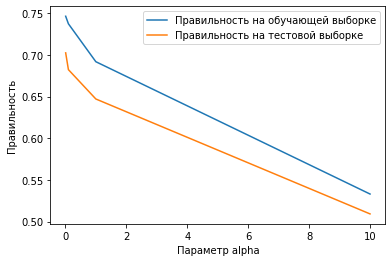

In [ ]:
#Lasso
alpha=[0.01,0.1,1,10]
trainig_accuracy=[]
test_accuracy=[]
cofs=[]

for i in range(len(alpha)):
  clf = linear_model.Lasso(alpha=alpha[i])
  clf.fit(x_train,y_train)
  trainig_accuracy.append(clf.score(x_train,y_train))
  test_accuracy.append(clf.score(x_test,y_test))
  cofs.append(clf.coef_)

cofs_lasso=np.copy(cofs)
plt.plot(alpha,trainig_accuracy,label="Правильность на обучающей выборке")
plt.plot(alpha,test_accuracy,label="Правильность на тестовой выборке")
plt.ylabel('Правильность')
plt.xlabel('Параметр alpha')
plt.legend()

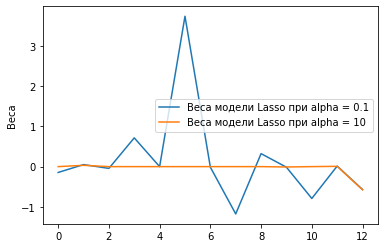

In [ ]:
plt.plot(cofs_lasso[1],label="Веса модели Lasso при alpha = 0.1")
plt.plot(cofs_lasso[3],label="Веса модели Lasso при alpha = 10")
plt.ylabel('Веса')
plt.legend()

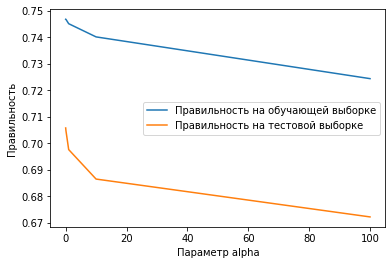

In [ ]:
#Ridge
alpha=[0.01,0.1,1,10,100]
trainig_accuracy=[]
test_accuracy=[]
cofs=[]

for i in range(len(alpha)):
  clf = linear_model.Ridge(alpha=alpha[i])
  clf.fit(x_train,y_train)
  trainig_accuracy.append(clf.score(x_train,y_train))
  test_accuracy.append(clf.score(x_test,y_test))

  cofs.append(clf.coef_)

plt.plot(alpha,trainig_accuracy,label="Правильность на обучающей выборке")
plt.plot(alpha,test_accuracy,label="Правильность на тестовой выборке")
plt.ylabel('Правильность')
plt.xlabel('Параметр alpha')
plt.legend()

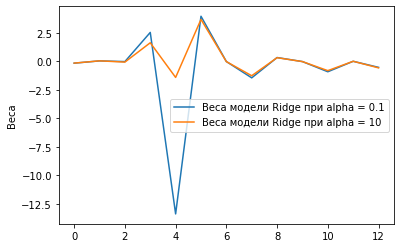

In [ ]:
plt.plot(cofs[1],label="Веса модели Ridge при alpha = 0.1")
plt.plot(cofs[3],label="Веса модели Ridge при alpha = 10")
plt.ylabel('Веса')
plt.legend()

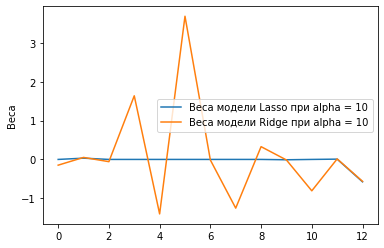

In [ ]:
plt.plot(cofs_lasso[3],label="Веса модели Lasso при alpha = 10")
plt.plot(cofs[3],label="Веса модели Ridge при alpha = 10")
plt.ylabel('Веса')
plt.legend()


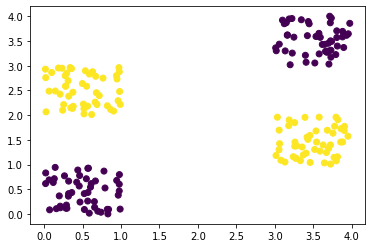

In [ ]:
np.random.seed(0)
X = np.random.rand(50, 2)
X = np.append(X, np.random.rand(50, 2) + np.array((3.0, 3.0)), axis = 0)
X = np.append(X, np.random.rand(50, 2) + np.array((0.0, 2.0)), axis = 0)
X = np.append(X, np.random.rand(50, 2) + np.array((3.0, 1.0)), axis = 0)
Y = np.append(np.zeros(100), np.ones(100), axis = 0)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=5)

clf_log = LogisticRegression().fit(X, Y)
clf_svc = SVC().fit(X, Y)

In [ ]:
print('Качество логистической регрессии')
print("На тренировочных данных",clf_log.score(x_train,y_train))
print("На тестовых данных",clf_log.score(x_test,y_test))

Качество логистической регрессии
На тренировочных данных 0.52
На тестовых данных 0.44


In [ ]:
print('Качество модели SVC ')
print("На тренировочных данных",clf_svc.score(x_train,y_train))
print("На тестовых данных",clf_svc.score(x_test,y_test))

Качество модели SVC 
На тренировочных данных 1.0
На тестовых данных 1.0


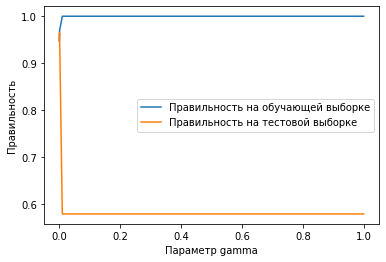

In [ ]:
data = load_breast_cancer()
gamma=[0.0001,0.001,0.01,0.1,1]
C_param=[0.001,0.01,0.1,1,10]
trainig_accuracy_g=[]
test_accuracy_g=[]

trainig_accuracy_c=[]
test_accuracy_c=[]

x_train, x_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.2,
                                                    random_state=5)

for i in range(len(gamma)):
  clf_svc_gamma = SVC(gamma=gamma[i]).fit(X, Y)
  clf_svc_gamma.fit(x_train,y_train)
  trainig_accuracy_g.append(clf_svc_gamma.score(x_train,y_train))
  test_accuracy_g.append(clf_svc_gamma.score(x_test,y_test))


  clf_svc_C = SVC(C=C_param[i]).fit(X, Y)
  clf_svc_C.fit(x_train,y_train)
  trainig_accuracy_c.append(clf_svc_C.score(x_train,y_train))

  test_accuracy_c.append(clf_svc_C.score(x_test,y_test))


plt.plot(gamma,trainig_accuracy_g,label="Правильность на обучающей выборке")
plt.plot(gamma,test_accuracy_g,label="Правильность на тестовой выборке")
plt.ylabel('Правильность')
plt.xlabel('Параметр gamma')
plt.legend()




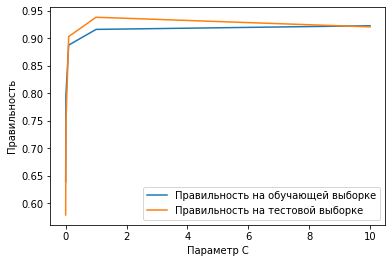

In [ ]:
plt.plot(C_param,trainig_accuracy_c,label="Правильность на обучающей выборке")
plt.plot(C_param,test_accuracy_c,label="Правильность на тестовой выборке")
plt.ylabel('Правильность')
plt.xlabel('Параметр C')
plt.legend()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Генерируем случайную последовательность чисел
X = np.array([i for i in range(10)]).reshape(-1, 1)
y = np.array([33*i + 1 for i in range(10)]).reshape(-1, 1)

k=2
# Разделяем последнее число для использования в качестве тестового значения
X_train, y_train = X[:3], y[:3]
X_test, y_test = X[k:], y[k:]
print(X_test)

print(y_test)


[[2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 67]
 [100]
 [133]
 [166]
 [199]
 [232]
 [265]
 [298]]


In [ ]:
# Создаем объект модели
model = LinearRegression()

# Обучаем модель на тренировочном наборе данных
model.fit(X_train, y_train)

# Делаем предсказание для тестового значения
y_pred = model.predict(X_test)
y_pred = np.round(y_pred, 5)
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
print("Предсказание для следующего числа: ", y_pred[0][0])

print(y_pred)


Предсказание для следующего числа:  67.0
[[ 67.00000]
 [ 100.00000]
 [ 133.00000]
 [ 166.00000]
 [ 199.00000]
 [ 232.00000]
 [ 265.00000]
 [ 298.00000]]


In [ ]:
# Генерируем новый набор данных
X_new = np.array([i for i in range(10, 20)]).reshape(-1, 1)
y_new = np.array([100*i + 1 for i in range(10, 20)]).reshape(-1, 1)

# Используем модель для предсказания на новых данных
y_pred_new = model.predict(X_new)

# Оцениваем качество предсказаний на новых данных
from sklearn.metrics import r2_score
r2_score(y_new, y_pred_new)


1.0